In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE


%matplotlib inline

In [ ]:
inv_df = pd.read_csv('dataset/Individual_clean_ML.csv')

In [ ]:
X = inv_df.drop(columns = {'loan_status'})
y = inv_df['loan_status']

In [ ]:
# Splitting Dataset into Test & Train

target_col = 'loan_status'

#feature space
X_train = inv_df.drop(columns=[target_col])
X_test = inv_df.drop(columns=[target_col])

#target variable
y_train = inv_df[target_col]
y_test = inv_df[target_col]



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,cibil_score,bal_annual_inc,inst_anmt_ratio,credit_line_ratio
0,1,13.99,6912.03,5,21,10,4,14.943679,0,5.91,0,155342.26,29.7,1,0,677,0.065455,0.034175,0.538462
1,1,11.99,46084.68,5,24,10,4,15.110733,0,16.06,0,1206220.03,19.2,4,0,717,0.380000,0.033210,0.578947
2,2,14.85,46625.15,5,20,10,4,15.636826,2,17.06,0,438329.23,11.6,1,0,787,0.318182,0.023711,0.764706
3,2,22.45,16287.62,2,9,3,4,15.584891,2,25.37,0,1232007.40,64.5,6,0,697,0.099585,0.027876,0.342857
4,1,13.44,22763.68,5,22,4,3,14.462706,2,10.20,0,495634.52,68.4,0,0,692,0.351471,0.033906,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139823,2,12.79,30534.73,5,24,7,4,15.490222,2,19.61,0,2777115.14,84.4,0,0,667,0.252632,0.022646,0.092593
2139824,2,10.49,28975.12,6,27,10,4,15.618477,0,34.94,1,1217175.45,39.0,4,0,697,0.222222,0.021489,0.413793
2139825,2,10.49,48291.50,6,27,9,4,16.361295,1,12.75,0,485016.18,64.9,3,0,707,0.176211,0.021489,0.135135
2139826,2,14.49,31717.91,5,21,6,3,15.636826,0,18.30,1,991100.49,68.1,2,1,662,0.218182,0.023523,0.322581


In [ ]:
def fit_score_clf(clf, X_train, y_train, X_test, y_test, name='clf'):
    """
    fits a classifer from sklearn and returns a dataframe
    clf(sklearn): classifier
    X_train(numpy): train features
    y_train(numpy): predictions row vector
    X_test(numpy): test features
    y_test(numpy): ground truth row vector
    name(string): name of classifier
    
    """
    #fit to train data
    clf.fit(X_train, y_train)
    #make predictions
    y_pred = clf.predict(X_test)
    #make dataframe from report
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    #add clf name as column
    clf_report['clf'] = name
    
    return clf_report

In [ ]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

clf_xgb = xgb.XGBClassifier(n_estimators=200,n_jobs=-1, scale_pos_weight=estimate)
clf_xgb_report = fit_score_clf(clf_xgb, X_train, y_train, X_test, y_test, name='xgb')
clf_xgb_report.head()

Estimate: 0.980


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,0,1,accuracy,macro avg,weighted avg,clf
precision,7.656425e-01,7.557586e-01,0.760512,7.607006e-01,7.606511e-01,xgb
recall,7.438799e-01,7.768147e-01,0.760512,7.603473e-01,7.605121e-01,xgb
f1-score,7.546043e-01,7.661420e-01,0.760512,7.603732e-01,7.604309e-01,xgb
support,1.059210e+06,1.080618e+06,0.760512,2.139828e+06,2.139828e+06,xgb


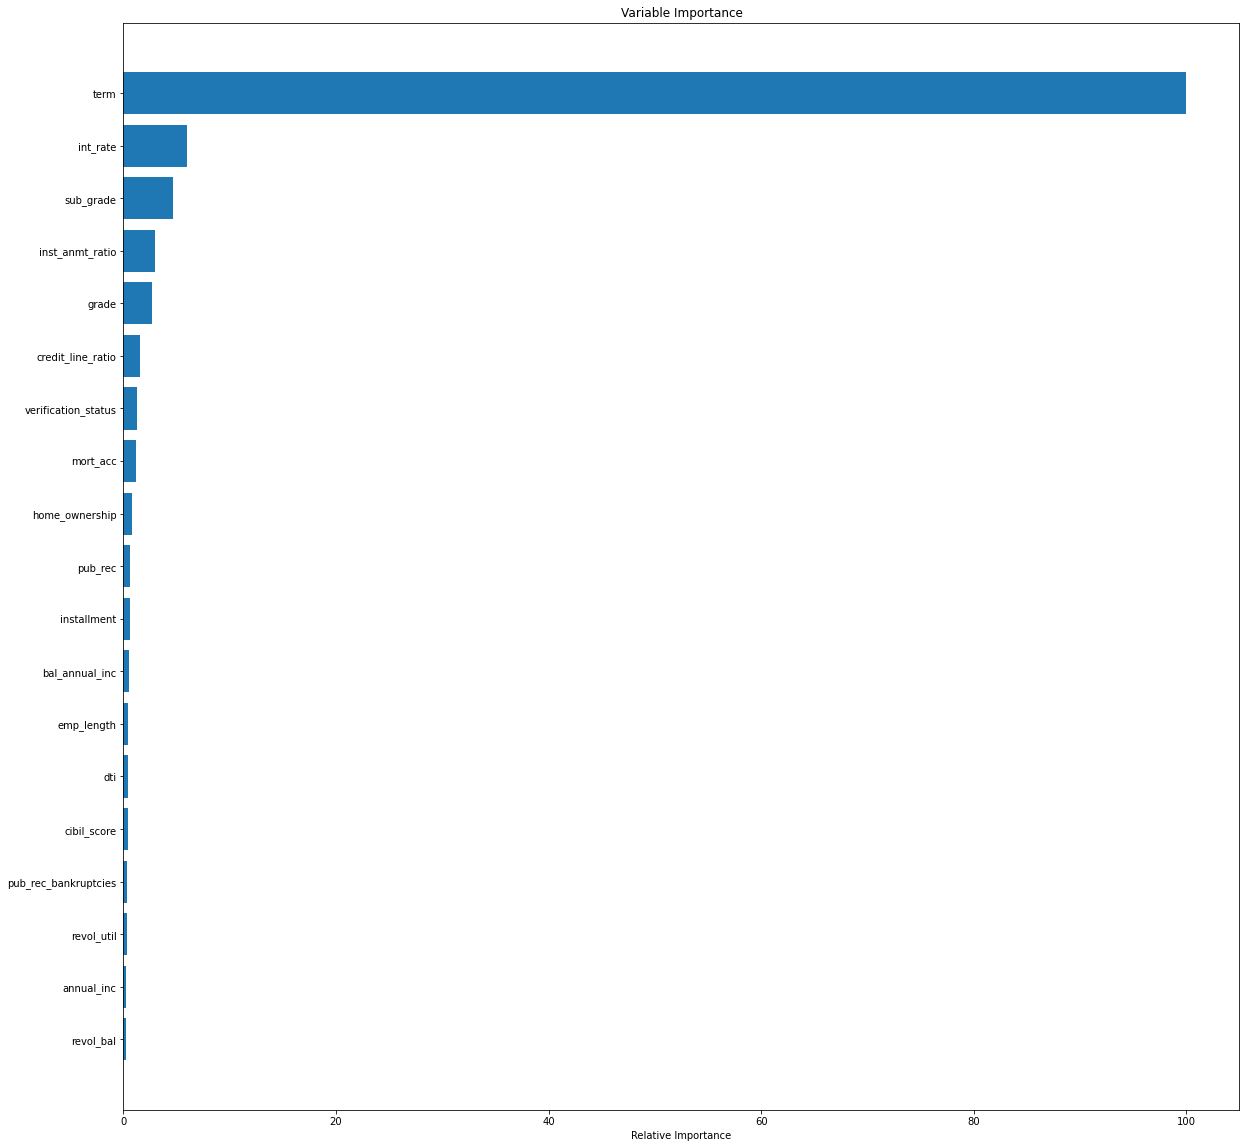

In [ ]:
feature_importance = clf_xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(20, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
keep_columns=['term','sub_grade','home_ownership','annual_inc',
              'verification_status','dti', 'revol_util', 'mort_acc', 
              'credit_line_ratio','bal_annual_inc', 
              'cibil_score','int_rate','inst_anmt_ratio']
select_X_train=X_train[keep_columns]
select_X_test=X_test[keep_columns]

In [ ]:
select_X_train = select_X_train.iloc[0:1069914,:]

In [ ]:
y_train = y_train.iloc[0:1069914]

In [ ]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
#define the param grid
# Parameters of pipelines can be set using ‘__’ separated para
clf_grid = {
    'xgb__eta': [0.05, 0.1, 0.3],
    'xgb__max_depth': [3, 6, 12],
    'xgb__colsample_bytree': [0.9, 1.0],
    }
#define the pipeline
model_pipe = Pipeline([
    ('xgb', xgb.XGBClassifier(n_estimators=200,
                              n_jobs=-1, scale_pos_weight=estimate))
])
#define the classifer
clf = GridSearchCV(model_pipe,
                   clf_grid,
                   n_jobs=-1,
                   cv=3, 
                   verbose=50, 
                   scoring='roc_auc')
#fit to training data
clf.fit(select_X_train, y_train)

Estimate: 0.978
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  14 tasks    

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                          

In [ ]:
print("Best model parameters: \n")
print(clf.best_params_ )
print("Best model score: \n")
print(clf.best_score_)

Best model parameters: 

{'xgb__colsample_bytree': 1.0, 'xgb__eta': 0.1, 'xgb__max_depth': 3}
Best model score: 

0.7155126033010627


In [ ]:
y_test = y_test.iloc[0:1069914]

In [ ]:
y_pred = clf.predict(select_X_test)
confusion_matrix(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [120000, 2139828]

In [ ]:
f1_gb = f1_score(y_test, y_pred)

print("f1_gb (binary): {}\n".format(f1_gb))
print(classification_report(y_test,y_pred))

In [ ]:
xgb_auc = roc_auc_score(y_test, clf.predict_proba(select_X_test)[:,1])
print("xgb_auc: {}".format(xgb_auc))

In [ ]:
#define location to save trained model
save_model_dir = os.path.join('xgb_cv_compact_individual_fifty_new.pkl')
print("Saving model at: {}".format(save_model_dir))

#save the model
with open(save_model_dir, 'wb') as handle:
    pickle.dump(clf,
                handle)

Saving model at: xgb_cv_compact_individual_fifty_new.pkl


In [ ]:
select_X_train=X_train[keep_columns].values
select_X_test=X_test[keep_columns].values

In [ ]:
y_train=y_train.values

In [ ]:
from tqdm import tqdm

auc_arr = []
for _ in tqdm(range(100)):
    idx = np.random.choice(np.arange(len(select_X_train)), 8000, replace=True)
    X_temp = select_X_train[idx]
    y_temp = y_train[idx]
        
    #instantiate classifier
    clf=x(learning_rate=0.01, n_estimators = 1000,max_depth=3)
    #fit to new data
    clf.fit(X_temp, y_temp)
    
    #predictions and scoring
    score = roc_auc_score(y_test, clf.predict_proba(select_X_test)[:,1])
    auc_arr.append(score)

In [ ]:
plt.hist(auc_arr)
plt.xlabel("AUC Score")
plt.xticks(np.arange(0.67, 0.77, 0.05))
plt.savefig('auc_632_sampling_individual.png')
plt.show()